In [ ]:
from sklearn.datasets import load_boston

In [ ]:
boston=load_boston()
x=boston.data[:,0:2]
y=boston.target
x.shape,y.shape


((506, 2), (506,))

In [ ]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
import pandas as pd
dfx=pd.DataFrame(x)
dfx.head()

,0,1
0,0.00632,18.0
1,0.02731,0.0
2,0.02729,0.0
3,0.03237,0.0
4,0.06905,0.0


In [ ]:
dfx.describe()

,0,1
count,506.000000,506.000000
mean,3.613524,11.363636
std,8.601545,23.322453
min,0.006320,0.000000
25%,0.082045,0.000000
50%,0.256510,0.000000
75%,3.677083,12.500000
max,88.976200,100.000000


In [ ]:
dfy=pd.DataFrame(y)
 
dfy.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [ ]:
#normalisation
#X=(X-u)/std
import numpy as np
u=np.mean(x,axis=0)
std=np.std(x,axis=0)
u.shape,std.shape
x=(x-u)/std


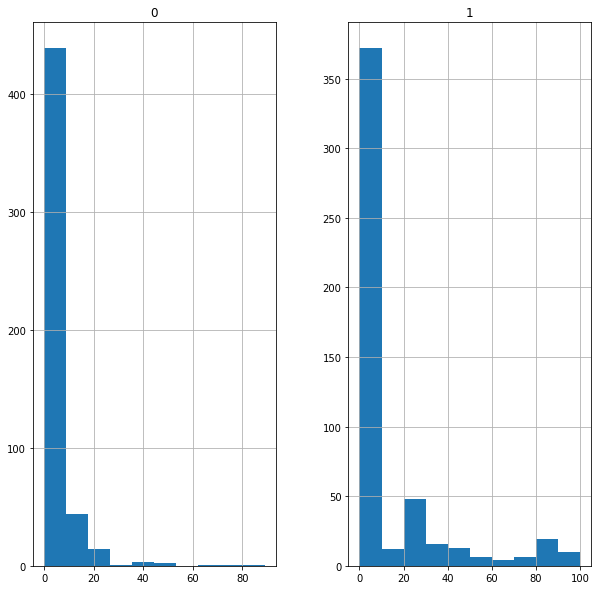

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
p = dfx.hist(figsize = (10,10))

 

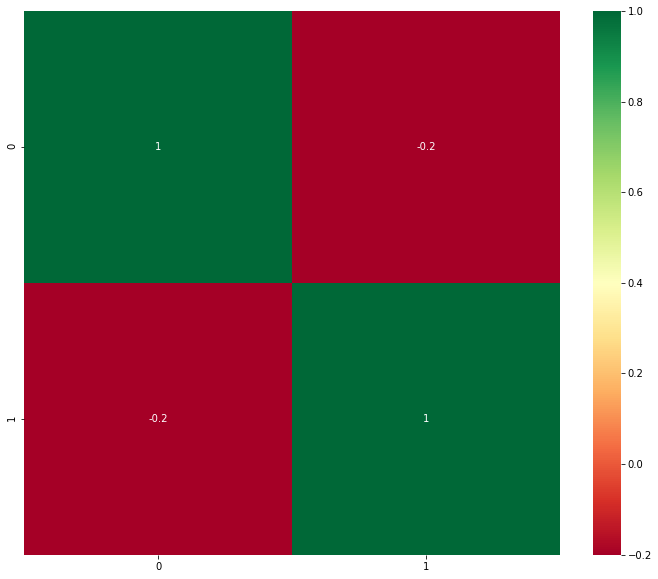

In [ ]:
plt.figure(figsize=(12,10))  
p=sns.heatmap(dfx.corr(), annot=True,cmap ='RdYlGn')

In [ ]:
from sklearn.linear_model import LinearRegression
regression= LinearRegression()
model=regression.fit(x,y)
model.intercept_   #value of theta[0]


22.532806324110677

In [89]:
model.coef_  #values of theta[1],theta[2]

array([-3.02542353,  2.70527167])

In [ ]:
#brute force approach
def hypothesis(x,theta):
  y_=0.0
  n=x.shape[0]
  for i in range(n):
    y_+=theta[i]*x[i]
  return y_

def error(x,y,theta):
  e_=0.0
  m=x.shape[0]
  for i in range(m):
    y_=hypothesis(x[i],theta)
    e+=(y_-y)**2
  return e/m

def gradient(x,y,theta):     
  m,n=x.shape[0]
  grad=np.zeros((2,))
  for j in range(n):
    for i in range(m):
      y_=hypothesis(x[i],theta)
      y=Y[i]
      grad[j]+=(y_ - y)*x[i][j]
      
  return grad/m   

def gradientdescent(X,Y,max_steps=300,learning_rate=0.1):    
  m,n=X.shape[0]
  theta=np.zeros((2,))   #theta is initialised as a numpy array of zeroes
  error_list=[]  
  for i in range(max_steps):
    grad=gradient(X,Y,theta)  #input
    e=error(X,Y,theta)
    error_list.append(e)
    for j in range(n):
      theta[j]=theta[j]-learning_rate*grad[j]    
     
  return theta,error_list   


   


In [94]:
#predictions
model.predict([x[0]])*1000       #first prediction

array([24573.36663171])

In [96]:
y[0]*1000                       #actual value 

24000.0

In [95]:
model.predict([x[1]])*1000    #second prediction

array([22476.01285467])

In [97]:
y[1]*1000                      #actual value

21600.0

In [98]:
model.score(x,y)

0.23398843834155303

In [100]:
print(model.score(x,y)*100,"%")

23.398843834155304 %
